## t-Distributed Stochastic Neighbor Embedding (t-SNE) 

### Pairwise Distances
T-Distribution vs Normal Distribution

The plots show how the probabilities assigned by the normal distribution and t-distribution change with varying pairwise distances.

Below are two scenarios: one where points are close together and another where points are far apart. 

The t-distribution assigns higher probabilities to larger distances, as seen in the heavier tails of the t-distribution curves. This property of the t-distribution helps in reducing crowding effects, especially when points are relatively far apart in the high-dimensional space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute pairwise similarities using the normal distribution
def normal_distribution_similarity(distance, sigma=1.0):
    return np.exp(-distance**2 / (2 * sigma**2))

# Function to compute pairwise similarities using the t-distribution
def t_distribution_similarity(distance):
    return 1 / (1 + distance**2)

In [2]:
# Pairwise distances for two scenarios: close and far
distances_close = np.linspace(0, 2, 100)
distances_far = np.linspace(0, 5, 100)

# Compute similarities using normal distribution for close and far scenarios
normal_probs_close = normal_distribution_similarity(distances_close)
normal_probs_far = normal_distribution_similarity(distances_far)

# Compute similarities using t-distribution for close and far scenarios
t_probs_close = t_distribution_similarity(distances_close)
t_probs_far = t_distribution_similarity(distances_far)

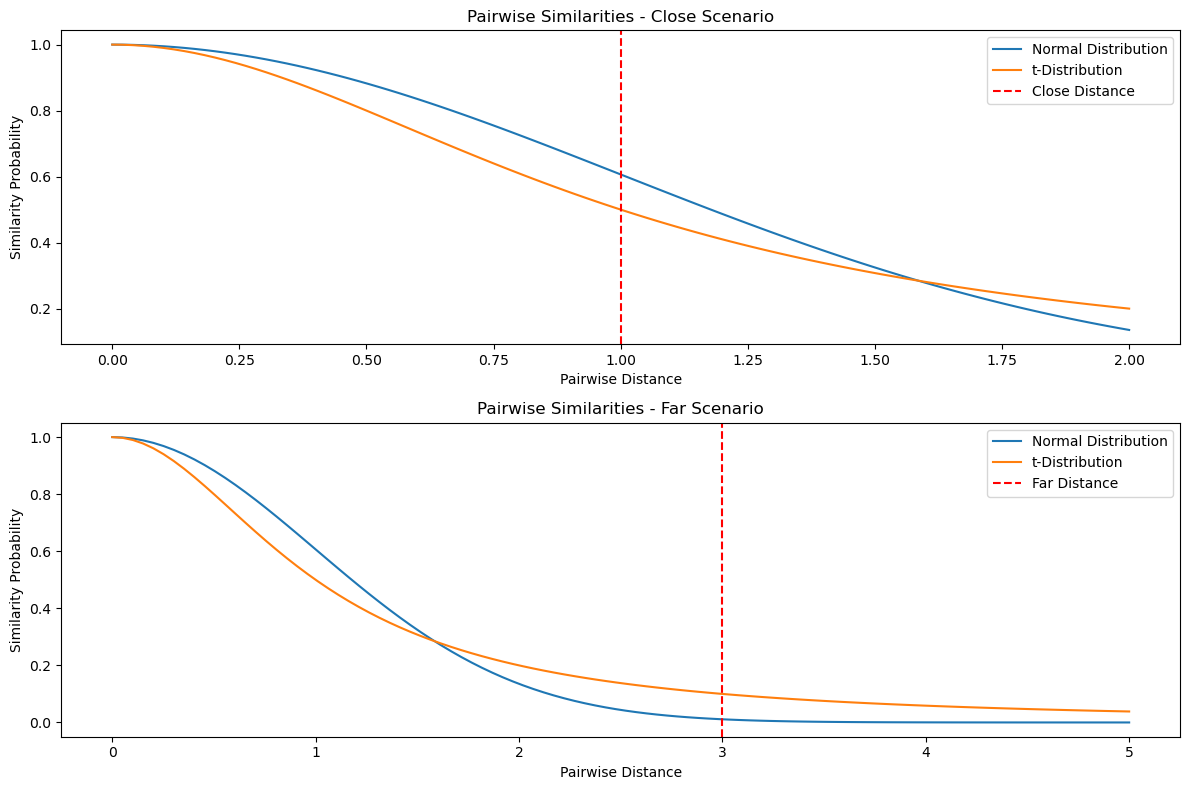

In [3]:
# Plotting
plt.figure(figsize=(12, 8))

# Plot for close scenario
plt.subplot(2, 1, 1)
plt.plot(distances_close, normal_probs_close, label='Normal Distribution')
plt.plot(distances_close, t_probs_close, label='t-Distribution')
plt.axvline(x=1, color='red', linestyle='--', label='Close Distance')
plt.title('Pairwise Similarities - Close Scenario')
plt.xlabel('Pairwise Distance')
plt.ylabel('Similarity Probability')
plt.legend()

# Plot for far scenario
plt.subplot(2, 1, 2)
plt.plot(distances_far, normal_probs_far, label='Normal Distribution')
plt.plot(distances_far, t_probs_far, label='t-Distribution')
plt.axvline(x=3, color='red', linestyle='--', label='Far Distance')
plt.title('Pairwise Similarities - Far Scenario')
plt.xlabel('Pairwise Distance')
plt.ylabel('Similarity Probability')
plt.legend()

plt.tight_layout()
plt.show()

## TSNE-IRIS

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.089s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.724350
[t-SNE] KL divergence after 1000 iterations: 0.120711
KL Divergence:  0.12071147561073303
Number of iterations:  999


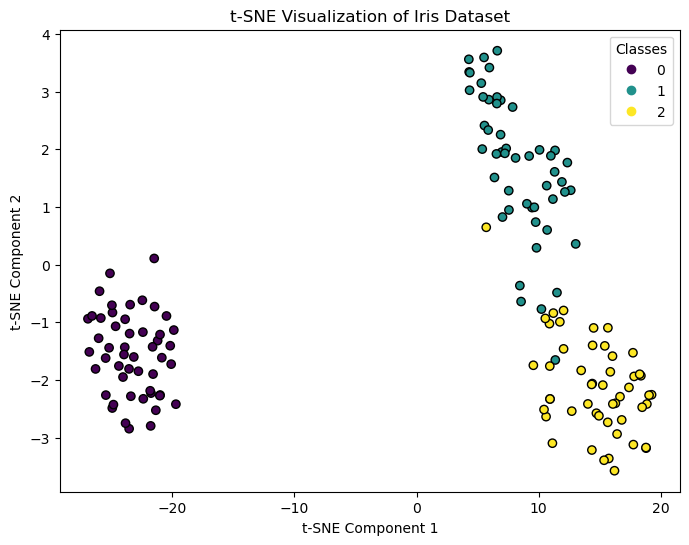

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, verbose=1)  # Set verbose to 1 for intermediate output
X_tsne = tsne.fit_transform(X)

# Print intermediate values
print("KL Divergence: ", tsne.kl_divergence_)
print("Number of iterations: ", tsne.n_iter_)

# Plot the 2D representation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('t-SNE Visualization of Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()
